In [4]:
# Data Wrangling
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# PreProcessing Data
from sklearn.preprocessing import OneHotEncoder
from collections import Counter

#Geocoding
import requests
import geopandas as gpd
import geopy
import folium
from geopy.distance import distance

# Predictions Algorithms
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


# Sampling
from imblearn.under_sampling import RandomUnderSampler

# Metrics

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


#Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## Loading all the datasets

In [5]:
EV_cleaned_data = pd.read_csv("Cleaned_Australian_EV_Charging_Stations.csv")

In [6]:
EV_cleaned_data

,Unnamed: 0,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,Plugs_Type2,Plugs_Three_Phase,...,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets
0,0,Chargefox Charging Station,-35.726720,145.659354,Cobram,2714,N.A,154 Campbell Rd,1.0,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,1,Secure Parking,-37.832108,144.969126,N.A,3205,Melbourne,"15-29 Bank Street, South Melbourne VIC 3205, A...",0.0,0.0,...,0.0,21.0,N.A,21.0,15,1,18,20,4,20
2,2,Lonsdale St,-37.813437,144.955934,N.A,3000,Melbourne,"535 Little Lonsdale St, Melbourne VIC 3004, Au...",0.0,0.0,...,0.0,0.0,N.A,2.0,20,2,18,20,20,20
3,3,Sorrento Community Centre,-38.338560,144.737043,N.A,3943,Melbourne,"860 Melbourne Rd, Sorrento VIC 3943, Australia",0.0,0.0,...,0.0,0.0,50.065,8.0,1,0,5,20,0,6
4,4,CTR Whittlesea,-37.510590,145.118412,N.A,3757,Melbourne,"74A Church St, Whittlesea VIC 3757, Australia",0.0,0.0,...,0.0,0.0,50.065,4.0,1,0,9,20,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,386,Brimbank Shopping Centre,-37.751827,144.775257,N.A,3023,Melbourne,"Brimbank Central Shopping Centre shop 81t, 28-...",2.0,0.0,...,0.0,0.0,N.A,2.0,1,0,10,20,1,7
387,387,QV Melbourne - Car Park,-37.810679,144.966601,N.A,3000,Melbourne,"180 Lonsdale Street, Melbourne VIC 3000, Austr...",0.0,0.0,...,0.0,3.0,N.A,3.0,16,7,17,20,20,20
388,388,Carlton,-37.803202,144.971757,N.A,3053,Melbourne,"11 Nicholson St, Carlton VIC 3053, Australia",0.0,0.0,...,0.0,0.0,N.A,2.0,16,11,18,20,20,20
389,389,RACV Solar,-38.197552,144.344603,N.A,3216,Geelong,"Units 5 & 6, 8 Lewalan St, Grovedale VIC 3216,...",1.0,0.0,...,0.0,0.0,22.0,1.0,2,0,5,15,0,3


In [7]:
print("\nData size :",EV_cleaned_data.shape)
print("\nNumber of records :",len(EV_cleaned_data))
print("\nNumber of atrributes :",len(EV_cleaned_data.columns))
print("\nDataset Information :", EV_cleaned_data.info())
EV_cleaned_data.describe()


Data size : (391, 24)

Number of records : 391

Number of atrributes : 24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  391 non-null    int64  
 1   Location Name               391 non-null    object 
 2   Latitude                    391 non-null    float64
 3   Longitude                   391 non-null    float64
 4   Town                        391 non-null    object 
 5   Postal Code                 391 non-null    object 
 6   City                        391 non-null    object 
 7   Address                     391 non-null    object 
 8   Plugs_Type2                 361 non-null    float64
 9   Plugs_Three_Phase           318 non-null    float64
 10  Plugs_CHAdeMO               373 non-null    float64
 11  Plugs_CCS/SAE               374 non-null    float64
 12  Plugs_Tesla      

,Unnamed: 0,Latitude,Longitude,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets
count,391.000000,391.000000,391.000000,361.000000,318.000000,373.000000,374.000000,351.000000,317.000000,318.000000,317.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,195.000000,-36.212610,145.253397,1.232687,0.025157,0.375335,0.414439,0.541311,0.003155,0.446541,2.899054,5.132992,1.828645,9.703325,15.429668,4.744246,8.347826
std,113.016223,5.167271,1.333809,1.979376,0.208636,0.805647,0.903912,1.170044,0.056166,1.856518,2.708852,6.641185,3.108103,6.362064,7.108286,6.843006,7.247758
min,0.000000,-38.522528,142.222919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,97.500000,-37.925594,144.923857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,10.500000,0.000000,2.000000
50%,195.000000,-37.818612,144.983228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,9.000000,20.000000,2.000000,7.000000
75%,292.500000,-37.717484,145.146020,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,6.000000,2.000000,16.000000,20.000000,5.000000,13.500000
max,390.000000,-16.474254,153.515274,16.000000,3.000000,4.000000,6.000000,6.000000,1.000000,21.000000,21.000000,20.000000,16.000000,20.000000,20.000000,20.000000,20.000000


In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = EV_cleaned_data.select_dtypes(include=numerics)
print('Number of numerical columns are:', len(numeric_df.columns))
numeric_df

Number of numerical columns are: 17


,Unnamed: 0,Latitude,Longitude,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets
0,0,-35.726720,145.659354,1.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0,0,0,0,0,0
1,1,-37.832108,144.969126,0.0,0.0,0.0,0.0,0.0,0.0,21.0,21.0,15,1,18,20,4,20
2,2,-37.813437,144.955934,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,20,2,18,20,20,20
3,3,-38.338560,144.737043,0.0,0.0,4.0,4.0,0.0,0.0,0.0,8.0,1,0,5,20,0,6
4,4,-37.510590,145.118412,0.0,0.0,2.0,2.0,0.0,0.0,0.0,4.0,1,0,9,20,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,386,-37.751827,144.775257,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,10,20,1,7
387,387,-37.810679,144.966601,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,16,7,17,20,20,20
388,388,-37.803202,144.971757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,16,11,18,20,20,20
389,389,-38.197552,144.344603,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0,5,15,0,3


In [9]:
# my_map = folium.Map(location = [-37.51059,145.118412], width = 1000, height = 600)

In [10]:
# # Latitude and longitude values passed in from dataset

# for _, station in EV_cleaned_data.iterrows():
#     folium.Marker(location = [station["Latitude"], station["Longitude"]],
#                  popup = station["Location Name"],
#                  tooltip = station["Location Name"]).add_to(my_map)

# my_map

In [11]:
# # Clustering existing EVCSs
# from folium import Marker
# from folium.plugins import MarkerCluster

# my_map = folium.Map(location = [-37.884254, 144.736465], width = 1000, height = 600)
# mc = MarkerCluster()

# for _, station in EV_cleaned_data.iterrows():
#     mc.add_child(Marker(location = [station["Latitude"], station["Longitude"]],
#                  popup = station["Location Name"], tooltip = station["Location Name"]))

# my_map.add_child(mc)

# my_map

In [12]:
# my_map.save('densityclusteringmap.html')

In [13]:
categorical = ['object']
categorical_df = EV_cleaned_data.select_dtypes(include=categorical)
print('Number of categorical columns are:', len(categorical_df.columns))
categorical_df

Number of categorical columns are: 7


,Location Name,Town,Postal Code,City,Address,Plugs_J-1772,Power 1
0,Chargefox Charging Station,Cobram,2714,N.A,154 Campbell Rd,NaN,NaN
1,Secure Parking,N.A,3205,Melbourne,"15-29 Bank Street, South Melbourne VIC 3205, A...",0,N.A
2,Lonsdale St,N.A,3000,Melbourne,"535 Little Lonsdale St, Melbourne VIC 3004, Au...",0,N.A
3,Sorrento Community Centre,N.A,3943,Melbourne,"860 Melbourne Rd, Sorrento VIC 3943, Australia",0,50.065
4,CTR Whittlesea,N.A,3757,Melbourne,"74A Church St, Whittlesea VIC 3757, Australia",0,50.065
...,...,...,...,...,...,...,...
386,Brimbank Shopping Centre,N.A,3023,Melbourne,"Brimbank Central Shopping Centre shop 81t, 28-...",0,N.A
387,QV Melbourne - Car Park,N.A,3000,Melbourne,"180 Lonsdale Street, Melbourne VIC 3000, Austr...",0,N.A
388,Carlton,N.A,3053,Melbourne,"11 Nicholson St, Carlton VIC 3053, Australia",2,N.A
389,RACV Solar,N.A,3216,Geelong,"Units 5 & 6, 8 Lewalan St, Grovedale VIC 3216,...",0,22.0


In [14]:
# Performing label encoding on required features
from sklearn import preprocessing

categ = ['Location Name', 'Town','City', 'Address','Plugs_J-1772', 'Power 1']

label_encoder = preprocessing.LabelEncoder()

EV_cleaned_data[categ] = EV_cleaned_data[categ].apply(label_encoder.fit_transform)

In [15]:
#drop address
EV_cleaned_data.drop(columns = {'Unnamed: 0','Address'},inplace = True)

In [16]:
#fill na column value with 0
EV_cleaned_data.fillna(0,inplace = True)

In [17]:
#find 'NA' value in postal code column, replace with int value
num=0
for i in np.where(EV_cleaned_data['Postal Code'] == 'N.A')[0]:
    EV_cleaned_data['Postal Code'].iloc[i]=num
    num+=1

EV_cleaned_data['Postal Code']=EV_cleaned_data['Postal Code'].astype('int')

EV_cleaned_data['Postal Code'].unique()

array([2714, 3205, 3000, 3943, 3757, 3922, 3125,    0, 3177, 3064, 3215,
       3018, 3933, 3463, 3931, 4878, 3928, 3217, 3168, 3940, 3936, 3075,
       3041, 3025, 3046, 3053, 3916, 3666, 3174, 3045, 3207, 3338, 3770,
       3122, 3934, 3002, 3042, 3083, 3028, 3023, 3024, 3008, 3072, 3060,
       3121, 3550, 4660, 3226, 3171, 3088,    1, 3123, 3067, 3763, 3084,
       4877, 3078, 3004, 3925, 3167, 3131, 3016, 3175, 3800, 3220, 2731,
       3056, 3460, 3685, 3182,    2, 3058, 3919, 3126, 3128, 3038, 3196,
       4563, 3402,    3, 3224, 3191, 3165, 3006, 3335, 3978, 3518,    4,
       3465, 4807, 3039, 3031, 3150, 3444, 3145, 3429, 3005, 3013, 3179,
       3442, 3030, 3190, 3151, 4812, 3148, 4007,    5,    6, 3517, 4720,
       3108,    7, 3003, 3094, 3178, 3189, 3181, 4300, 3169, 4700,    8,
       3160, 3199, 3937, 4849, 4870, 4860, 3775, 3170,    9, 3140, 3076,
       3082, 3029,   10,   11, 3915, 3011, 3214,   12, 3923, 4854, 3187,
       3134, 4858,   13, 3228, 3453, 3079,   14, 43

In [18]:
EV_cleaned_data.dtypes

Location Name                   int64
Latitude                      float64
Longitude                     float64
Town                            int64
Postal Code                     int64
City                            int64
Plugs_Type2                   float64
Plugs_Three_Phase             float64
Plugs_CHAdeMO                 float64
Plugs_CCS/SAE                 float64
Plugs_Tesla                   float64
Plugs_J-1772                    int64
Plugs_Caravan_Mains_Socket    float64
Plugs_wall_AU/NZ              float64
Power 1                         int64
charging_stations             float64
Nearby EVStations               int64
Hospitals                       int64
Parks                           int64
Restaurants                     int64
Malls                           int64
Supermarkets                    int64
dtype: object

In [19]:
# Let us perform clustering using Kmeans CLustering

For cluster = 1, SSE/WCSS is 334102706.42625177
For cluster = 2, SSE/WCSS is 91709537.53619227
For cluster = 3, SSE/WCSS is 22968402.199127115
For cluster = 4, SSE/WCSS is 8319652.013011565
For cluster = 5, SSE/WCSS is 6150474.289342865
For cluster = 6, SSE/WCSS is 4756057.216203443
For cluster = 7, SSE/WCSS is 3904138.352530773
For cluster = 8, SSE/WCSS is 3231898.8948618243
For cluster = 9, SSE/WCSS is 2750480.714962988
For cluster = 10, SSE/WCSS is 2433010.7148065856


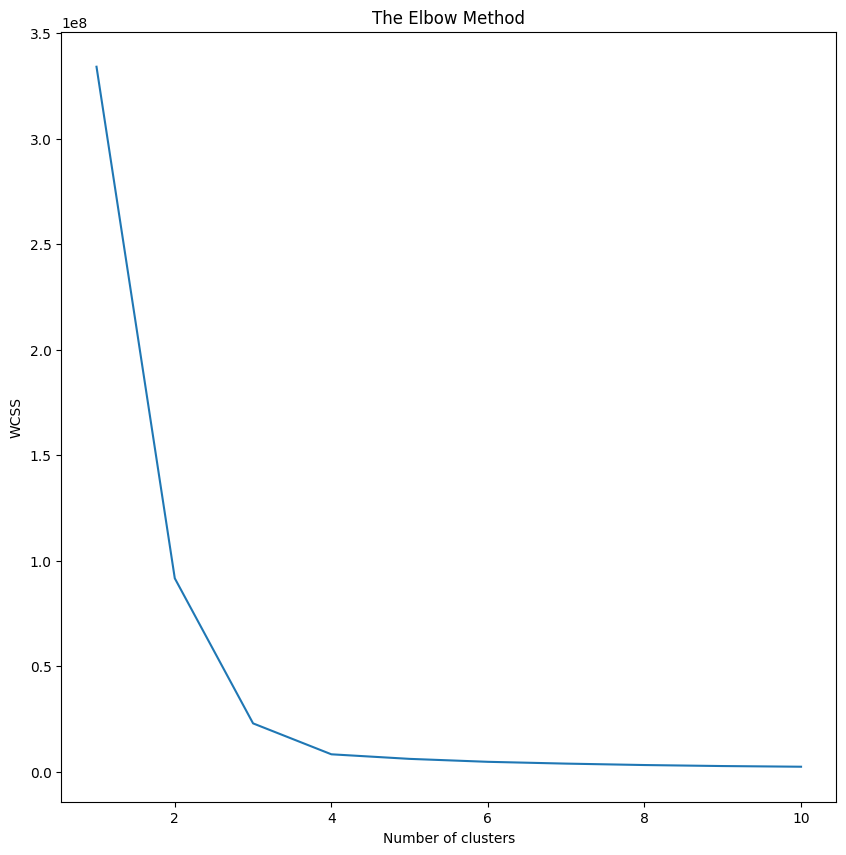

In [20]:
wcss = [] # Within cluster sum of squares (WCSS)
sse = {}

for i in range(1,11):
    model_new_df = KMeans(n_clusters = i, init = "k-means++")
    model_new_df.fit(EV_cleaned_data)
    wcss.append(model_new_df.inertia_)
    sse[i] = model_new_df.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))
  
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print('Best K-value (using KneeLocator) utilizing k-means:',kl.elbow)

Best K-value (using KneeLocator) utilizing k-means: 3


In [22]:
centers = np.array(model_new_df.cluster_centers_)
k_model = KMeans(n_clusters = 4, init = "k-means++",  max_iter = 50, n_init = 10, random_state = 0)
clustered_data = k_model.fit_predict(EV_cleaned_data)

In [23]:
predict_kmeans = k_model.labels_
print(predict_kmeans)

[0 0 0 2 2 2 2 0 2 1 0 0 0 0 2 0 2 3 2 0 0 2 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0
 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 0 0 0 1 0 0 2 0 3 0 0 2 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 1 0 2 0 0 0 2 0 0 0 0 0 3 0 0 0
 1 0 0 0 0 0 0 0 0 2 2 0 0 1 0 0 0 0 0 3 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 2 0 3 0 0 2 1 0 0 0 1 2 3 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 3
 0 1 0 0 0 0 0 0 0 2 0 3 0 2 3 0 3 0 0 0 0 2 0 1 0 2 0 3 0 0 0 0 0 0 0 0 1
 0 0 2 1 0 0 2 2 0 0 1 0 2 0 0 2 2 3 0 0 0 0 0 0 0 3 0 0 0 1 0 0 2 0 3 0 0
 3 1 0 0 0 3 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 3 0 0 0 3 2 0
 0 0 0 0 2 0 3 2 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 1 3 0 1 2 0 1 0 0 2 0
 2 3 2 0 0 1 2 0 0 2 0 1 2 2 0 0 2 2 0 0 0 0 0 0 2 2 0 0 0 1 0 3 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 2 0 0 3 0 2 0 0 0 0 2]


In [24]:
# Frequency count of the Output clusters
unique, counts = np.unique(predict_kmeans, return_counts=True)
print('Unique sample counts per cluster:', dict(zip(unique, counts)))

Unique sample counts per cluster: {0: 276, 1: 23, 2: 68, 3: 24}


In [25]:
#Append the Clusters 

EV_cleaned_data["Clusters"] = clustered_data
EV_cleaned_data.head()

,Location Name,Latitude,Longitude,Town,Postal Code,City,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,...,Plugs_wall_AU/NZ,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,Clusters
0,51,-35.726720,145.659354,11,2714,9,1.0,0.0,0.0,0.0,...,0.0,25,0.0,0,0,0,0,0,0,0
1,247,-37.832108,144.969126,38,3205,8,0.0,0.0,0.0,0.0,...,21.0,24,21.0,15,1,18,20,4,20,0
2,160,-37.813437,144.955934,38,3000,8,0.0,0.0,0.0,0.0,...,0.0,24,2.0,20,2,18,20,20,20,0
3,256,-38.338560,144.737043,38,3943,8,0.0,0.0,4.0,4.0,...,0.0,17,8.0,1,0,5,20,0,6,2
4,41,-37.510590,145.118412,38,3757,8,0.0,0.0,2.0,2.0,...,0.0,17,4.0,1,0,9,20,0,1,2


In [26]:
mapping = {0:'Severe', 1:'High', 2:'Moderate' , 3:'Low'}

In [27]:
clus_type = EV_cleaned_data[['Clusters']]
clus_type['cluster_density_level'] = clus_type['Clusters'].replace(mapping)

In [28]:
EV_cleaned_data['cluster_density_level'] = clus_type['cluster_density_level']

In [29]:
EV_cleaned_data

,Location Name,Latitude,Longitude,Town,Postal Code,City,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,...,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,Clusters,cluster_density_level
0,51,-35.726720,145.659354,11,2714,9,1.0,0.0,0.0,0.0,...,25,0.0,0,0,0,0,0,0,0,Severe
1,247,-37.832108,144.969126,38,3205,8,0.0,0.0,0.0,0.0,...,24,21.0,15,1,18,20,4,20,0,Severe
2,160,-37.813437,144.955934,38,3000,8,0.0,0.0,0.0,0.0,...,24,2.0,20,2,18,20,20,20,0,Severe
3,256,-38.338560,144.737043,38,3943,8,0.0,0.0,4.0,4.0,...,17,8.0,1,0,5,20,0,6,2,Moderate
4,41,-37.510590,145.118412,38,3757,8,0.0,0.0,2.0,2.0,...,17,4.0,1,0,9,20,0,1,2,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,34,-37.751827,144.775257,38,3023,8,2.0,0.0,0.0,0.0,...,24,2.0,1,0,10,20,1,7,0,Severe
387,223,-37.810679,144.966601,38,3000,8,0.0,0.0,0.0,0.0,...,24,3.0,16,7,17,20,20,20,0,Severe
388,46,-37.803202,144.971757,38,3053,8,0.0,0.0,0.0,0.0,...,24,2.0,16,11,18,20,20,20,0,Severe
389,233,-38.197552,144.344603,38,3216,4,1.0,0.0,0.0,0.0,...,8,1.0,2,0,5,15,0,3,0,Severe


In [30]:
# Dropping unwanted columns for prediction.

pred_df = EV_cleaned_data.drop(['cluster_density_level','Latitude','Longitude','Location Name','Town','City'], axis=1)

In [31]:
pred_df

,Postal Code,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,Clusters
0,2714,1.0,0.0,0.0,0.0,0.0,5,0.0,0.0,25,0.0,0,0,0,0,0,0,0
1,3205,0.0,0.0,0.0,0.0,0.0,1,0.0,21.0,24,21.0,15,1,18,20,4,20,0
2,3000,0.0,0.0,0.0,0.0,2.0,1,0.0,0.0,24,2.0,20,2,18,20,20,20,0
3,3943,0.0,0.0,4.0,4.0,0.0,1,0.0,0.0,17,8.0,1,0,5,20,0,6,2
4,3757,0.0,0.0,2.0,2.0,0.0,1,0.0,0.0,17,4.0,1,0,9,20,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,3023,2.0,0.0,0.0,0.0,0.0,1,0.0,0.0,24,2.0,1,0,10,20,1,7,0
387,3000,0.0,0.0,0.0,0.0,0.0,1,0.0,3.0,24,3.0,16,7,17,20,20,20,0
388,3053,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,24,2.0,16,11,18,20,20,20,0
389,3216,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,8,1.0,2,0,5,15,0,3,0


<Axes: >

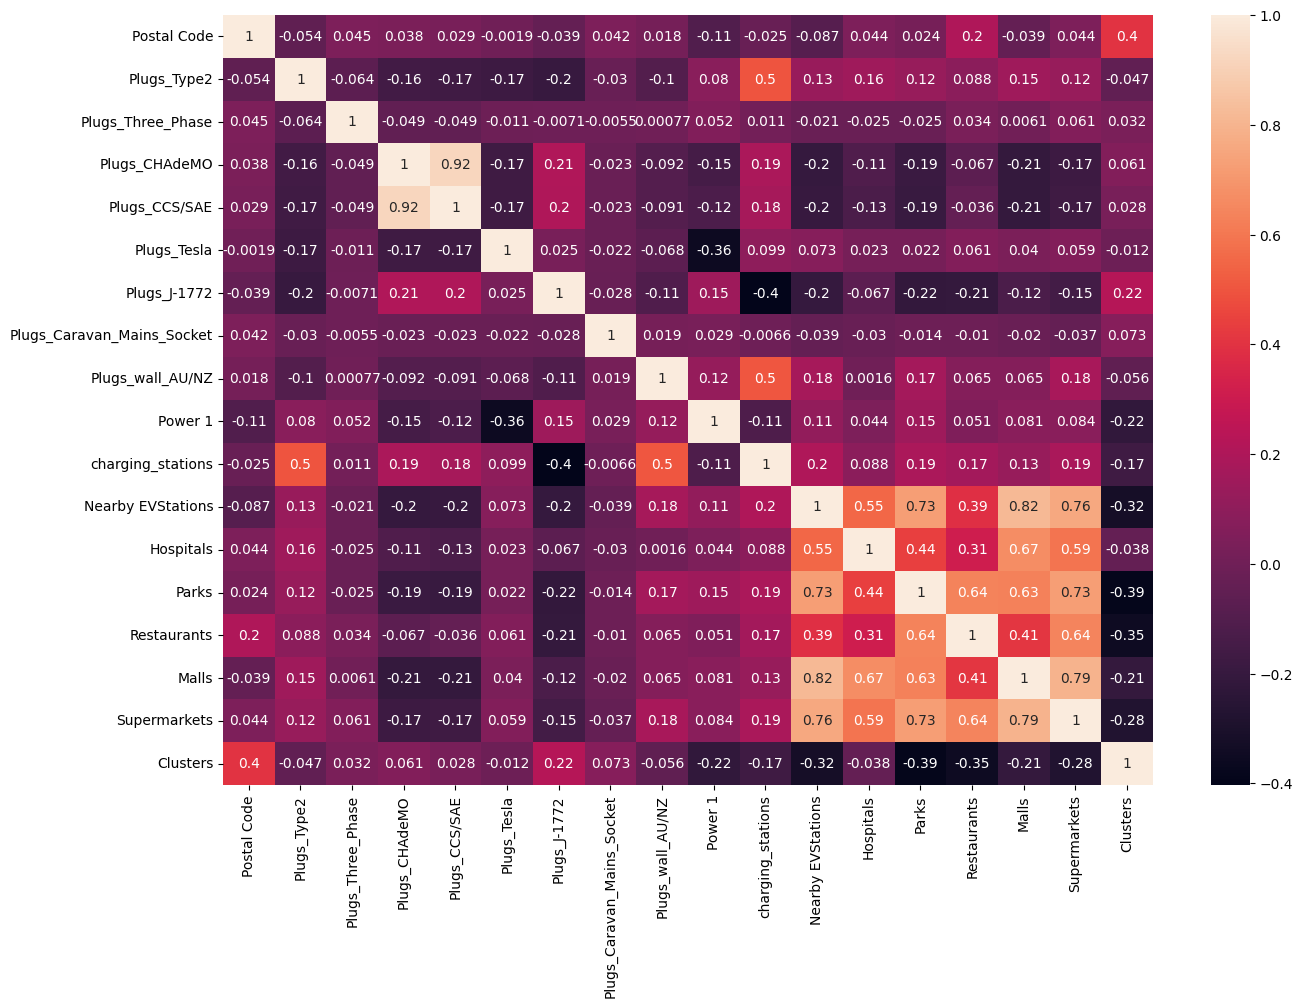

In [32]:
#Correlation matrix
pred_df.corr()

#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(pred_df.corr(), annot = True)

In [33]:
correlation = pred_df.corr()['Clusters'].abs().sort_values(ascending = False)
correlation

Clusters                      1.000000
Postal Code                   0.397551
Parks                         0.388432
Restaurants                   0.349416
Nearby EVStations             0.324928
Supermarkets                  0.278466
Plugs_J-1772                  0.224222
Power 1                       0.221292
Malls                         0.208359
charging_stations             0.168188
Plugs_Caravan_Mains_Socket    0.072910
Plugs_CHAdeMO                 0.060516
Plugs_wall_AU/NZ              0.055808
Plugs_Type2                   0.047321
Hospitals                     0.038234
Plugs_Three_Phase             0.031584
Plugs_CCS/SAE                 0.027776
Plugs_Tesla                   0.012261
Name: Clusters, dtype: float64

In [34]:
# check if there are any missing values in the dataframe?
print(" \nCount total number of missing values in the DataFrame : \n\n", pred_df.isnull().sum().sum())

 
Count total number of missing values in the DataFrame : 

 0


In [35]:
#extract features that both have high correlation with cluster and might be interesting to users
pred_df_lowerD = pred_df[["Postal Code","Parks","Restaurants","Nearby EVStations","Supermarkets","Power 1","Malls","charging_stations","Hospitals","Clusters"]]
pred_df_lowerD

,Postal Code,Parks,Restaurants,Nearby EVStations,Supermarkets,Power 1,Malls,charging_stations,Hospitals,Clusters
0,2714,0,0,0,0,25,0,0.0,0,0
1,3205,18,20,15,20,24,4,21.0,1,0
2,3000,18,20,20,20,24,20,2.0,2,0
3,3943,5,20,1,6,17,0,8.0,0,2
4,3757,9,20,1,1,17,0,4.0,0,2
...,...,...,...,...,...,...,...,...,...,...
386,3023,10,20,1,7,24,1,2.0,0,0
387,3000,17,20,16,20,24,20,3.0,7,0
388,3053,18,20,16,20,24,20,2.0,11,0
389,3216,5,15,2,3,8,0,1.0,0,0


In [36]:
pred_df_lowerD.shape

(391, 10)

In [37]:
# Preprocessing
# Splitting data into features and target variable

data=pred_df_lowerD.copy()


y = data['Clusters'] # Target variable
X = data.iloc[:,:-1] # Features

In [38]:
print(X)
print(X.shape)

     Postal Code  Parks  Restaurants  Nearby EVStations  Supermarkets  \
0           2714      0            0                  0             0   
1           3205     18           20                 15            20   
2           3000     18           20                 20            20   
3           3943      5           20                  1             6   
4           3757      9           20                  1             1   
..           ...    ...          ...                ...           ...   
386         3023     10           20                  1             7   
387         3000     17           20                 16            20   
388         3053     18           20                 16            20   
389         3216      5           15                  2             3   
390         3943      7           20                  1             6   

     Power 1  Malls  charging_stations  Hospitals  
0         25      0                0.0          0  
1         24      4

In [39]:
print(y)
print(y.shape)

0      0
1      0
2      0
3      2
4      2
      ..
386    0
387    0
388    0
389    0
390    2
Name: Clusters, Length: 391, dtype: int32
(391,)


In [40]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [41]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (273, 9)
X_test shape  is :  (118, 9)
y_train shape is :  (273,)
y_test shape is  :  (118,)


In [42]:
#split into train/validation set 
M_train, M_test, N_train, N_test=train_test_split(X_train, y_train, test_size=0.3, random_state=1)

### 1. Random Forest

In [43]:
# Best Random Forest Model

rfclf = RandomForestClassifier(random_state=1)
rfclf.fit(M_train,N_train)

RandomForestClassifier(random_state=1)

In [44]:
# Predicted Outcome
n_pred = rfclf.predict(M_test)

In [45]:
def printScore(testData,predictData):
    print(confusion_matrix(testData,predictData))
    print(classification_report(testData,predictData))

    # Model Accuracy: how often is the classifier correct?
    base_accuracy_rf = metrics.accuracy_score(testData,predictData)
    print("Accuracy:", base_accuracy_rf)

    # Model Precision: what percentage of positive tuples are labeled as such?
    print("Precision:",metrics.precision_score(testData,predictData, average='weighted'))

    # Model Recall: what percentage of positive tuples are labelled as such?
    print("Recall:",metrics.recall_score(testData,predictData, average='weighted'))

    #Calculate F1 Score
    print("F1 Score:",metrics.f1_score(testData,predictData, average='weighted'))

    #Calculate Mean Absolute Error
    print("Mean Absolute Error:",metrics.mean_absolute_error(testData,predictData))

In [46]:
print('Random Forest on validation set')
printScore(N_test,n_pred)

Random Forest on validation set
[[55  0  0  0]
 [ 0  1  0  0]
 [ 2  0 16  0]
 [ 0  0  0  8]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       1.00      1.00      1.00         1
           2       1.00      0.89      0.94        18
           3       1.00      1.00      1.00         8

    accuracy                           0.98        82
   macro avg       0.99      0.97      0.98        82
weighted avg       0.98      0.98      0.98        82

Accuracy: 0.975609756097561
Precision: 0.9764655541292255
Recall: 0.975609756097561
F1 Score: 0.9751101660176267
Mean Absolute Error: 0.04878048780487805


In [47]:
print("10 fold cross validation result")
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfclf, X_train, y_train, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
cvScore_rf=scores.mean()

10 fold cross validation result
0.97 accuracy with a standard deviation of 0.03


In [48]:
# Predicted Outcome
n_pred_test = rfclf.predict(X_test)

print('Random Forest on test set')
printScore(y_test,n_pred_test)

acc_test_rf = metrics.accuracy_score(y_test, n_pred_test)

Random Forest on test set
[[76  0  0  0]
 [ 3  8  0  0]
 [ 0  0 23  0]
 [ 0  0  1  7]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        76
           1       1.00      0.73      0.84        11
           2       0.96      1.00      0.98        23
           3       1.00      0.88      0.93         8

    accuracy                           0.97       118
   macro avg       0.98      0.90      0.93       118
weighted avg       0.97      0.97      0.96       118

Accuracy: 0.9661016949152542
Precision: 0.9674202603160982
Recall: 0.9661016949152542
F1 Score: 0.9641482637062743
Mean Absolute Error: 0.03389830508474576


### 2.K-Nearest Neigbours

In [49]:
# Best K-Nearest Neighbours Model
from sklearn.neighbors import KNeighborsClassifier  
knnclf = KNeighborsClassifier()
knnclf.fit(M_train,N_train)

KNeighborsClassifier()

In [50]:
# Predicted Outcome
knn_pred = knnclf.predict(M_test)

In [51]:
print('K-Nearest Neighbours (KNN) on validation set')
printScore(N_test,knn_pred)

K-Nearest Neighbours (KNN) on validation set
[[55  0  0  0]
 [ 0  1  0  0]
 [ 2  0 16  0]
 [ 0  0  0  8]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       1.00      1.00      1.00         1
           2       1.00      0.89      0.94        18
           3       1.00      1.00      1.00         8

    accuracy                           0.98        82
   macro avg       0.99      0.97      0.98        82
weighted avg       0.98      0.98      0.98        82

Accuracy: 0.975609756097561
Precision: 0.9764655541292255
Recall: 0.975609756097561
F1 Score: 0.9751101660176267
Mean Absolute Error: 0.04878048780487805


In [52]:
print("10 fold cross validation result")
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knnclf, X_train, y_train, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
cvScore_knn=scores.mean()

10 fold cross validation result
0.99 accuracy with a standard deviation of 0.02


In [53]:
# Predicted Outcome
knn_pred_test = knnclf.predict(X_test)

print('KNN on test set')
printScore(y_test,knn_pred_test)

acc_test_knn = metrics.accuracy_score(y_test, knn_pred_test)

KNN on test set
[[76  0  0  0]
 [ 0 11  0  0]
 [ 1  0 22  0]
 [ 0  0  0  8]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      1.00      1.00        11
           2       1.00      0.96      0.98        23
           3       1.00      1.00      1.00         8

    accuracy                           0.99       118
   macro avg       1.00      0.99      0.99       118
weighted avg       0.99      0.99      0.99       118

Accuracy: 0.9915254237288136
Precision: 0.9916354831609069
Recall: 0.9915254237288136
F1 Score: 0.9914589564639416
Mean Absolute Error: 0.01694915254237288


### 3. XgBoost

In [54]:
# Best XGBoost Model
from xgboost import XGBClassifier  

xgbclf = XGBClassifier(random_state=1)  

xgbclf.fit(M_train,N_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [55]:
# Predicted Outcome
xgb_pred = xgbclf.predict(M_test)

In [56]:
print('XGBoost on validation set')
printScore(N_test,xgb_pred)

XGBoost on validation set
[[55  0  0  0]
 [ 0  1  0  0]
 [ 0  0 18  0]
 [ 0  0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         8

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Mean Absolute Error: 0.0


In [57]:
print("10 fold cross validation result")
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgbclf, X_train, y_train, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
cvScore_xgb=scores.mean()

10 fold cross validation result
0.99 accuracy with a standard deviation of 0.01


In [58]:
# Predicted Outcome
xgb_pred_test = xgbclf.predict(X_test)

print('XGBoost on test set')
printScore(y_test,xgb_pred_test)

acc_test_xgb = metrics.accuracy_score(y_test, xgb_pred_test)

XGBoost on test set
[[76  0  0  0]
 [ 0 11  0  0]
 [ 0  0 23  0]
 [ 0  0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00         8

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Mean Absolute Error: 0.0


### 4. SVM

In [59]:
# Best Support Vector Machine Model
from sklearn.svm import SVC
svmclf = SVC(random_state=1)
svmclf.fit(M_train,N_train)

SVC(random_state=1)

In [60]:
# Predicted Outcome
svm_pred = svmclf.predict(M_test)

In [61]:
print('SVM on validation set')
printScore(N_test,svm_pred)

SVM on validation set
[[55  0  0  0]
 [ 0  1  0  0]
 [ 2  0 16  0]
 [ 0  0  2  6]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       1.00      1.00      1.00         1
           2       0.89      0.89      0.89        18
           3       1.00      0.75      0.86         8

    accuracy                           0.95        82
   macro avg       0.96      0.91      0.93        82
weighted avg       0.95      0.95      0.95        82

Accuracy: 0.9512195121951219
Precision: 0.9520753102267865
Recall: 0.9512195121951219
F1 Score: 0.9496951219512195
Mean Absolute Error: 0.07317073170731707


In [62]:
print("10 fold cross validation result")
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svmclf, X_train, y_train, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
cvScore_svm=scores.mean()

10 fold cross validation result
0.99 accuracy with a standard deviation of 0.02


In [63]:
# Predicted Outcomes
svm_pred_test = svmclf.predict(X_test)

print('SVM on test set')
printScore(y_test,svm_pred_test)

acc_test_svm = metrics.accuracy_score(y_test, svm_pred_test)

SVM on test set
[[76  0  0  0]
 [ 0 11  0  0]
 [ 1  0 22  0]
 [ 0  0  1  7]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      1.00      1.00        11
           2       0.96      0.96      0.96        23
           3       1.00      0.88      0.93         8

    accuracy                           0.98       118
   macro avg       0.99      0.96      0.97       118
weighted avg       0.98      0.98      0.98       118

Accuracy: 0.9830508474576272
Precision: 0.9831609068897205
Recall: 0.9830508474576272
F1 Score: 0.9827960562756176
Mean Absolute Error: 0.025423728813559324


### 5. Logistic Regression

In [64]:
# Best Logistic Regression

logreg = LogisticRegression(random_state=1)
logreg.fit(M_train,N_train)

LogisticRegression(random_state=1)

In [65]:
# Predicted Outcome
log_pred = logreg.predict(M_test)

In [66]:
print('Logistic regression on validation set')
printScore(N_test,log_pred)

Logistic regression on validation set
[[52  0  3  0]
 [ 0  1  0  0]
 [11  0  6  1]
 [ 3  0  4  1]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        55
           1       1.00      1.00      1.00         1
           2       0.46      0.33      0.39        18
           3       0.50      0.12      0.20         8

    accuracy                           0.73        82
   macro avg       0.69      0.60      0.61        82
weighted avg       0.69      0.73      0.69        82

Accuracy: 0.7317073170731707
Precision: 0.6907442151344589
Recall: 0.7317073170731707
F1 Score: 0.6931764537586724
Mean Absolute Error: 0.5121951219512195


In [67]:
print("10 fold cross validation result")
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
cvScore_log=scores.mean()

10 fold cross validation result
0.81 accuracy with a standard deviation of 0.05


In [68]:
# Predicted Outcomes
log_pred_test = logreg.predict(X_test)

print('Logistic regression on test set')
printScore(y_test,log_pred_test)

acc_test_log = metrics.accuracy_score(y_test, log_pred_test)

Logistic regression on test set
[[72  0  3  1]
 [ 0 11  0  0]
 [13  0  8  2]
 [ 2  0  5  1]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        76
           1       1.00      1.00      1.00        11
           2       0.50      0.35      0.41        23
           3       0.25      0.12      0.17         8

    accuracy                           0.78       118
   macro avg       0.64      0.61      0.62       118
weighted avg       0.74      0.78      0.75       118

Accuracy: 0.7796610169491526
Precision: 0.7406487434248977
Recall: 0.7796610169491526
F1 Score: 0.7534774157941465
Mean Absolute Error: 0.4067796610169492


### Tabulate the results

In [69]:
from tabulate import tabulate

In [70]:
cv_accuracies = ['CV Accuracy',cvScore_rf,cvScore_knn,cvScore_xgb,cvScore_svm,cvScore_log]
Names = ['Classifier', 'Random Forest', 'KNN', 'XgBoost', 'SVM', 'Logistic Regression']
test_accuracies = ['Accuracy on testset', acc_test_rf,acc_test_knn,acc_test_xgb, acc_test_svm, acc_test_log]

In [71]:
table = zip(Names, cv_accuracies, test_accuracies)

In [72]:
print(tabulate(table, headers= 'firstrow', floatfmt=".4f" ,tablefmt = 'fancy_grid' ))

╒═════════════════════╤═══════════════╤═══════════════════════╕
│ Classifier          │   CV Accuracy │   Accuracy on testset │
╞═════════════════════╪═══════════════╪═══════════════════════╡
│ Random Forest       │        0.9706 │                0.9661 │
├─────────────────────┼───────────────┼───────────────────────┤
│ KNN                 │        0.9889 │                0.9915 │
├─────────────────────┼───────────────┼───────────────────────┤
│ XgBoost             │        0.9927 │                1.0000 │
├─────────────────────┼───────────────┼───────────────────────┤
│ SVM                 │        0.9852 │                0.9831 │
├─────────────────────┼───────────────┼───────────────────────┤
│ Logistic Regression │        0.8097 │                0.7797 │
╘═════════════════════╧═══════════════╧═══════════════════════╛


#### Based on the table, we can conclude that XgBoost classifier performed the best among all the five ML algorithms

In [73]:
xgb_pred_test 

array([0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 3, 0, 0, 1, 0, 2, 1,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       2, 3, 0, 0, 0, 2, 3, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 0, 0, 3, 2, 2, 1, 0, 0, 1, 0,
       0, 0, 3, 2, 2, 2, 0, 0])

In [74]:
mapping = {0:'Severe', 1:'High', 2:'Moderate' , 3:'Low'}

In [75]:
final_predicted_df = pd.DataFrame(xgb_pred_test )

In [76]:
final_predicted_df.rename(columns = { 0 : 'Cluster Level'},inplace = True)

In [77]:
final_predicted_df['cluster_density_level'] = final_predicted_df['Cluster Level'].replace(mapping)
final_predicted_df

,Cluster Level,cluster_density_level
0,0,Severe
1,0,Severe
2,1,High
3,1,High
4,0,Severe
...,...,...
113,2,Moderate
114,2,Moderate
115,2,Moderate
116,0,Severe


In [78]:
# Save the predicted column back to the test dataset.
final_predicted_df.to_csv("Predicted Cluster level on test data.csv")
print('Your File has been saved')

Your File has been saved


### Extract model to display on the website

In [79]:
import pickle

In [80]:
# Saving model to pickle file
with open("xgboost_density_clustering.pkl", "wb") as file: # file is a variable for storing the newly created file, it can be anything.
    pickle.dump(xgbclf, file) # Dump function is used to write the object into the created file in byte format.